## Final Project Submission

Please fill out:
* Student(s) name: Thenya Thuita,
                    Vivian Mosomi,
                    Stephen Ndaro,
                    Andrew Mutuku,
                    Sammy Toroitich.
* Student(s) pace: Part Time-04B 
* Scheduled project review date/time: 30th October - 4th November 2023
* Instructor name: Faith Rotich
* Blog post URL:


## BUSINESS UNDERSTANDING

The core of this project lies in gaining a profound understanding of the real estate market and providing valuable insights to various stakeholders. Let's delve into the business understanding aspect in relation to the project:
Real Estate Market Analysis: Understanding the real estate market is essential for both buyers and sellers. By analyzing the data set, we aim to identify trends, factors, and patterns that influence housing prices. This knowledge can help potential buyers make informed decisions, assist sellers in setting competitive prices, and guide investors in identifying profitable opportunities.
Investment Decision Support: Real estate is a significant investment for most individuals. Buyers, especially first-time home buyers, need insights into what features drive property prices. We aim to provide recommendations on where to invest based on the property's attributes, which could potentially save buyers money and time.
Seller Strategies: For those selling properties, understanding the market and how specific features influence prices is crucial. By comprehending the impact of variables like condition, location, and grade, sellers can make informed decisions about property improvements and pricing strategies.
Market Trends: As a real estate agent, investor, or market analyst, having access to market trends can be invaluable. Analyzing this data set can help in predicting future price changes and identifying areas with appreciating property values.
Risk Management: For investors in the real estate market, understanding the relationship between property features and prices is vital for risk assessment. This analysis can contribute to more informed and profitable investment decisions.

## DATA UNDERSTANDING

Effective data understanding is fundamental to deriving meaningful insights from the data set. In the context of this project, the data understanding phase involves the following aspects:
Data Collection,Data Cleaning,Exploratory Data Analysis (EDA),Feature Selection,Data  processing,Data Visualization and Data Quality Assurance

#### Variables
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


In [137]:
#Importing needed libraries and visualizing the original dataframe as df
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df = pd.read_csv('data/kc_house_data.csv')
# df = pd.read_csv("D:\Moringa_windows_fld\Phase_2_Project\dsc-phase-2-project-v2-3-main\data\kc_house_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## DATA PREPARATION

#### 1. Cleaning the Data 

In [138]:
# dropping columns not needed for the modelling process

filt_data = df.drop(columns=['date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'])
filt_data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


In [139]:
# Checking our filtered data for null values
filt_data.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

We have 2376 missing values in the waterfront column

In [141]:
# Dealing with the missing values

filt_data['waterfront'].fillna('Missing Value',inplace=True)

# Checking if the waterfront still has missing values
filt_data.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [142]:
filt_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,Missing Value,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


#### 2. One Hot Encoding To Handle Numerical Columns

In [143]:
''' 
The linear regression model cannot be built with categorical columns.
'''

' \nThe linear regression model cannot be built with categorical columns.\n'

In [144]:
# Using one hot encoding for waterfront and condition which are categorical columns
filt_data = pd.get_dummies(filt_data,columns=["condition","grade","waterfront"], drop_first=True, dtype=int)
filt_data


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,condition_Fair,condition_Good,...,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,waterfront_NO,waterfront_YES
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1955,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,1951,0,0,...,0,0,0,0,0,1,0,0,1,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,1933,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1965,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1987,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,2009,0,0,...,0,0,0,0,0,0,1,0,1,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,2014,0,0,...,0,0,0,0,0,0,1,0,1,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,2009,0,0,...,0,0,0,0,0,1,0,0,1,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,2004,0,0,...,0,0,0,0,0,0,1,0,0,0


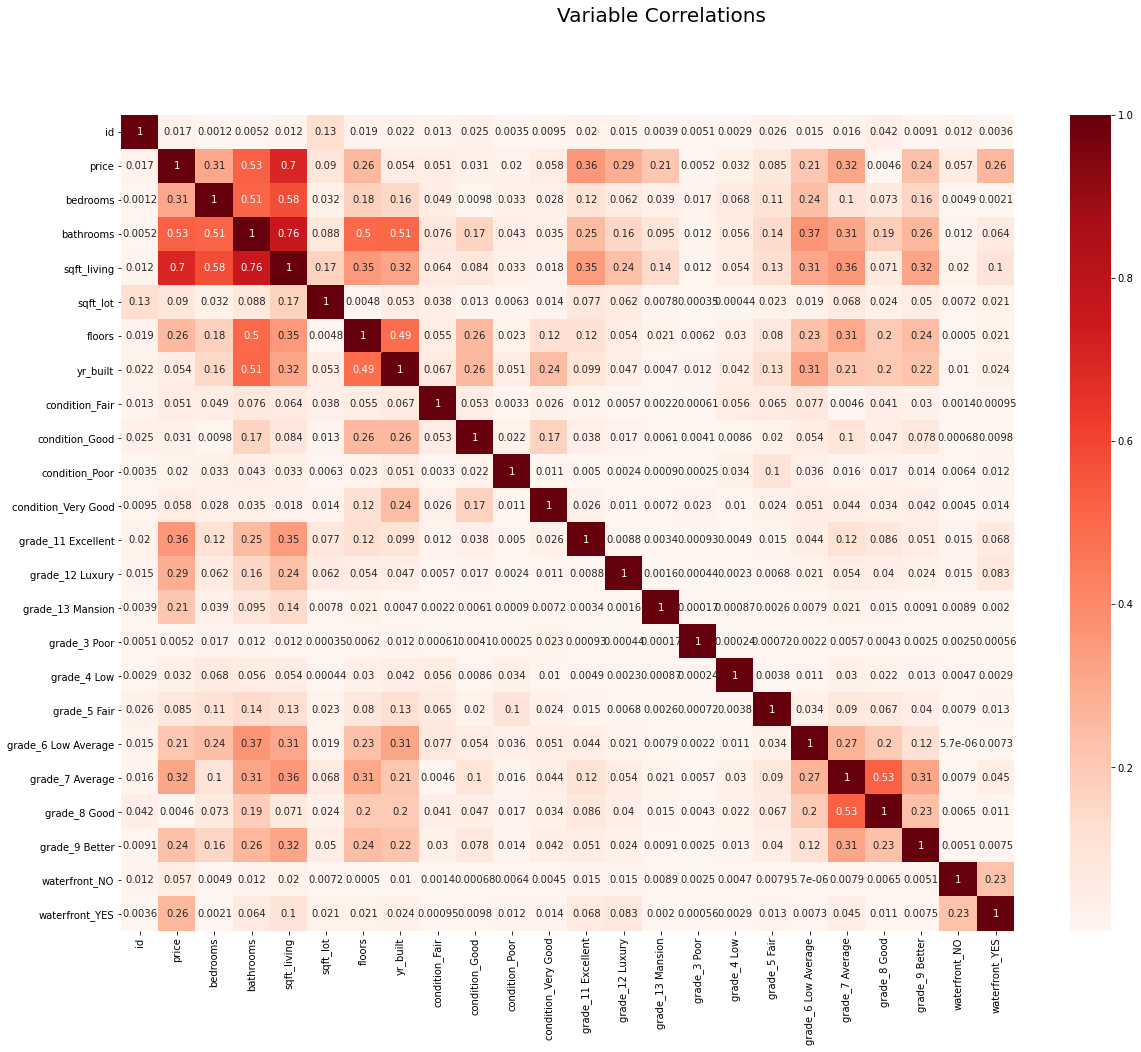

In [145]:
#Visualzing the correlation of different columns using a heat map

corr = filt_data.corr().abs()
fig, ax=plt.subplots(figsize=(20,15))
fig.suptitle('Variable Correlations', fontsize=20, y=.98, fontname='DejaVu Sans')
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)

Note that from above `sqft_living` has the highest correlation to the price column this will be used to create a simple linear regression model to show the change in `price` as to the change in `sqft_living`

# MODELLING and REGRESSION RESULTS

## SIMPLE LINEAR REGRESSION MODEL

In [146]:
''' 
These are simple models for the most correlated columns with price which are sqft_living, bathrooms, bedrooms and floors to help
us understand the relationship between the target variable and the independent variables
'''

' \nThese are simple models for the most correlated columns with price which are sqft_living, bathrooms, bedrooms and floors to help\nus understand the relationship between the target variable and the independent variables\n'

In [147]:
#Simple model for sqft_living
#formula y~x
sqft_living_formula = 'price ~ sqft_living '
sqft_living_model = ols(sqft_living_formula,filt_data).fit()

# Finding the predicted values and the residuals for plotting
predicted_values_sqft_living = sqft_living_model.fittedvalues
residuals_sqft_living = sqft_living_model.resid

sqft_living_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:00:06   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
''' 
According to the above results, our model explains 49.3% of the variance in price.
Our model is statistically significant because our F-statistic p-value is less than 0.05
The model coefficients(const and sqft_living are both statistically significant with t-statistic p-values less than 0.05
For 1 square foot increase in living room, the price increases by 280.
If the sqft_living is 0, our price would be -4.399e+04(-43,990)
'''

' \nAccording to the above results, our model explains 49.3% of the variance in price.\nOur model is statistically significant because our F-statistic p-value is less than 0.05\nThe model coefficients(const and sqft_living are both statistically significant with t-statistic p-values less than 0.05\nFor 1 square foot increase in living room, the price increases by 280.\nIf the sqft_living is 0, our price would be -4.399e+04(-43,990)\n'

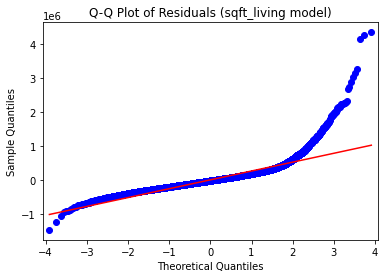

In [149]:
# Assuming 'sqft_living_model' is the fitted regression model

residuals_sqft_living = sqft_living_model.resid

# Create a Q-Q plot of the residuals
sm.qqplot(residuals_sqft_living, line='s')
plt.title('Q-Q Plot of Residuals (sqft_living model)')
plt.show()



As we can see, this model violates the homoscedasticity and normality assumptions for linear regression. Log-transformation can often help when these assumptions are not met. Let's update the values to their natural logs and re-check the assumptions.

In [150]:
filt_data['price'] = np.log(filt_data['price'])
filt_data['sqft_living'] = np.log(filt_data['sqft_living'])

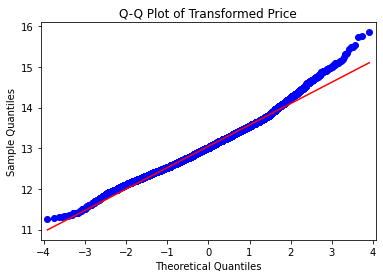

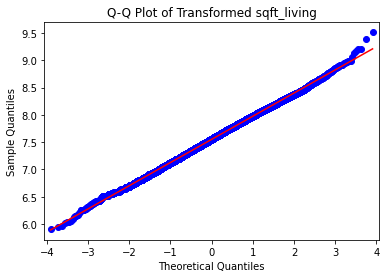

In [151]:
# Create a Q-Q plot for the 'price' variable
sm.qqplot(filt_data['price'], line='s')
plt.title('Q-Q Plot of Transformed Price')
plt.show()

# Create a Q-Q plot for the 'sqft_living' variable
sm.qqplot(filt_data['sqft_living'], line='s')
plt.title('Q-Q Plot of Transformed sqft_living')
plt.show()


In [152]:
''' 
Now we've solved the heteroscedasticity problem for the most correlated column with price which is sqft_living
'''

" \nNow we've solved the heteroscedasticity problem for the most correlated column with price which is sqft_living\n"

In [153]:
#Simple linear regression model for bedrooms

bedrooms_formula = 'price ~ bedrooms'
bedrooms_model = ols(bedrooms_formula,filt_data).fit()

# Fitted values and residuals
predicted_values_bedrooms = bedrooms_model.fittedvalues
residuals_bedrooms= bedrooms_model.resid
bedrooms_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     2886.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:00:07   Log-Likelihood:                -15437.
No. Observations:               21597   AIC:                         3.088e+04
Df Residuals:                   21595   BIC:                         3.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3898      0.013    974.903      0.000      12.365      12.415
bedrooms       0.1952      0.004     53.724      0.000       0.188       0.202
==============================================================================
Omnibus:                      791.447   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1471.526
Skew:                           0.290   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
''' 
Our bedrooms model explain 11.8% of our variance in prices
It is statistically significant because our f-statistic p-value is less than 0.05
'''

' \nOur bedrooms model explain 11.8% of our variance in prices\nIt is statistically significant because our f-statistic p-value is less than 0.05\n'

In [155]:
# Simple linear regression Model for bathrooms

bathrooms_formula = 'price ~ bathrooms'
bathrooms_model = ols(bathrooms_formula,filt_data).fit()

# Fitted values and residuals
predicted_values_bathrooms = bathrooms_model.fittedvalues
residuals_bathrooms = bathrooms_model.resid
bathrooms_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     9427.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:00:07   Log-Likelihood:                -12880.
No. Observations:               21597   AIC:                         2.576e+04
Df Residuals:                   21595   BIC:                         2.578e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2496      0.009   1399.614      0.000      12.232      12.267
bathrooms      0.3775      0.004     97.092      0.000       0.370       0.385
==============================================================================
Omnibus:                      191.594   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.538
Skew:                           0.232   Prob(JB):                     2.10e-43
Kurtosis:                       3.063   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
#Simple linear regression Model for floors

floors_formula = 'price ~ floors'
floors_model = ols(floors_formula,filt_data).fit()

# Fitted values and residuals
predicted_values_floors = floors_model.fittedvalues
residuals_floors = floors_model.resid
floors_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     2306.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:00:07   Log-Likelihood:                -15696.
No. Observations:               21597   AIC:                         3.140e+04
Df Residuals:                   21595   BIC:                         3.141e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5954      0.010   1256.346      0.000      12.576      12.615
floors         0.3031      0.006     48.023      0.000       0.291       0.315
==============================================================================
Omnibus:                      836.437   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1031.279
Skew:                           0.437   Prob(JB):                    1.15e-224
Kurtosis:                       3.618   Cond. No.                         6.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
''' 
Our rooms model explain 9.6% of our variance in prices
It is statistically significant because our f-statistic p-value is less than 0.05
'''

' \nOur rooms model explain 9.6% of our variance in prices\nIt is statistically significant because our f-statistic p-value is less than 0.05\n'

The scatter plots below are to show if the data has the character of heteroscedasticity, which will be observed if the spread of the residuals changes systematically as predicted values change by forming a defined shape like a cone or a funnel-like pattern.

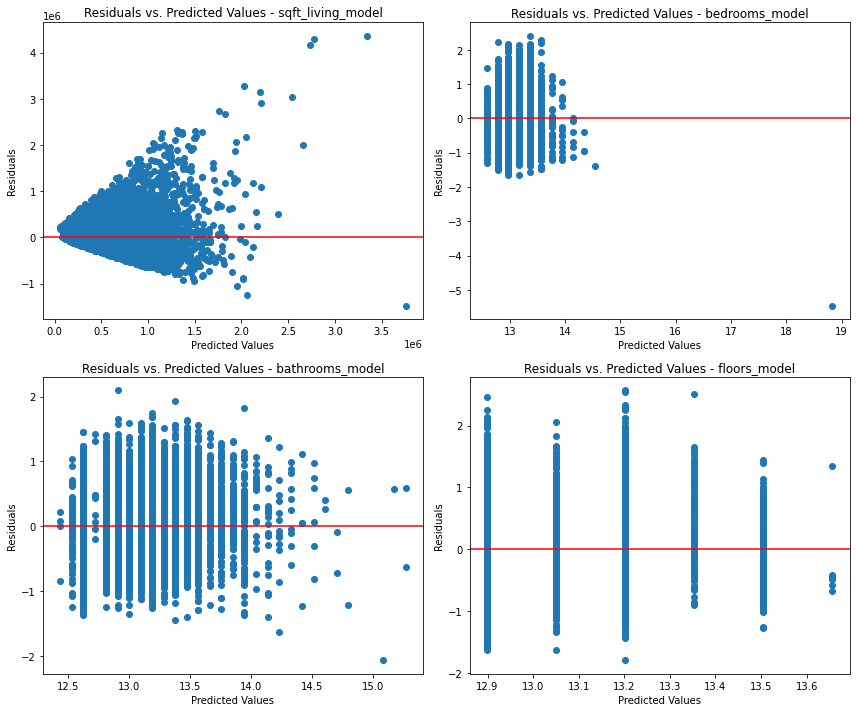

In [158]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# List of predicted_values and residuals for each model

predicted_values_list = [predicted_values_sqft_living, predicted_values_bedrooms, predicted_values_bathrooms ,predicted_values_floors]
residuals_list = [residuals_sqft_living, residuals_bedrooms, residuals_bathrooms, residuals_floors]
model_names = ['sqft_living_model', 'bedrooms_model', 'bathrooms_model', 'floors_model']

for i, ax in enumerate(axs.flatten()):
    ax.scatter(predicted_values_list[i], residuals_list[i])
    ax.axhline(y=0, color='r', linestyle='-')
    ax.set_title(f"Residuals vs. Predicted Values - {model_names[i]}")
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')

plt.tight_layout()
plt.show()


In [159]:
''' 
From the plots above, our residuals are normally distributed because there is a high density of points close to the origin and a low density
of points away from the origin .
The residuals are symmetric around the origin
'''

' \nFrom the plots above, our residuals are normally distributed because there is a high density of points close to the origin and a low density\nof points away from the origin .\nThe residuals are symmetric around the origin\n'

In [160]:
# Slope (coefficient of x, y=0)

m = sqft_living_model.params['sqft_living']
# Intercept (coefficient of Intercept)
b = sqft_living_model.params['Intercept']


print(f"""
Our simple linear regression model found a y-intercept
of ${round(b, 2)}, then for every increase of 1 square foot
above-living area, the price increases by ${round(m, 2)} 
""")


Our simple linear regression model found a y-intercept
of $-43988.89, then for every increase of 1 square foot
above-living area, the price increases by $280.86 



## MULTIPLE LINEAR REGRESSION MODEL

Before building the multiple linear regression model, We completed a simple linear regession analysis for(`sqft_living`,`bedrooms`,`bathrooms` and `floors`), they had the highest correlation to `price` with no violation to multicollinearity assumption.
Also they do not present heteroscedasticity hence they do not violate the assumption of homoscedasticity.

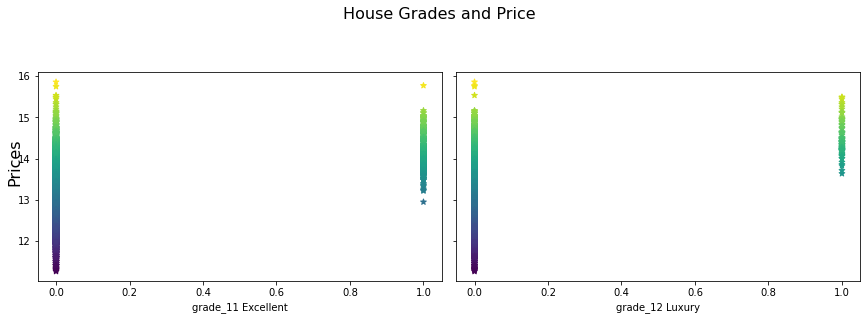

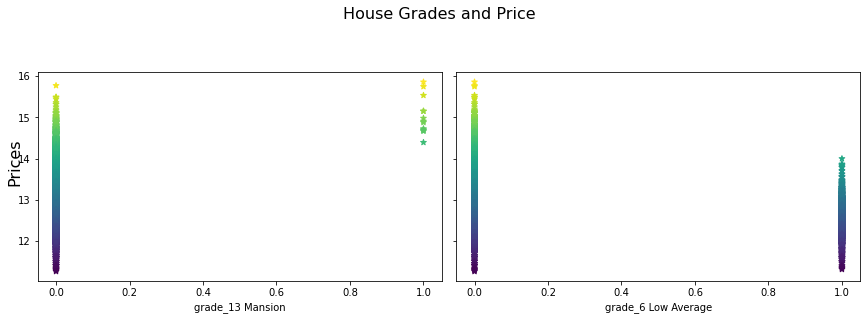

In [161]:
# Using a function to show linear relationship of price and one-hot encoded columns

def plot_scatter(columns, price):
    num_columns = len(columns)
    
    # Creating a figure for plotting
    fig, axes = plt.subplots(1, num_columns, sharex=False, sharey=True, figsize=(6 * num_columns, 4))

    # Setting title and labels
    fig.suptitle('House Grades and Price', fontsize=16, y=1.1, fontname='DejaVu Sans')
    fig.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='DejaVu Sans')

    for i, column in enumerate(columns):
        if num_columns == 2:
            # Scatter plot for two columns
            sc = axes[i].scatter(column, price, c=price, marker="*")
            axes[i].set_xlabel(column.name)
    
    # Adjusting the layout and displaying the plot
    fig.tight_layout()
    plt.show()

# Example usage:
columns_to_plot = [
    [filt_data['grade_11 Excellent'], filt_data['grade_12 Luxury']],
    [filt_data['grade_13 Mansion'], filt_data['grade_6 Low Average']],
    [filt_data['grade_7 Average']]
]

for column_pair in columns_to_plot:
    # Filter out pairs with only one column
    if len(column_pair) > 1:
        plot_scatter(column_pair, filt_data['price'])

From the above plots, grade_6 Low Average and grade_12 Luxury have the most pronounced relationship hence they will be used in the model.

#### Model 1

In [162]:
#Model 1(With numerical columns only)
multiple_formula_1 = 'price ~ sqft_living + bathrooms + bedrooms + floors'
# Fit the model
multiple_model_1 = ols(multiple_formula_1, filt_data).fit()
print(multiple_model_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     4798.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:00:10   Log-Likelihood:                -9924.1
No. Observations:               21597   AIC:                         1.986e+04
Df Residuals:                   21592   BIC:                         1.990e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7566      0.067    100.441      

In [163]:
''' 
Our model has an r-squared value of 47.1 and therefore explains 47.1% of the variance in price
It is also statistically significant because our f-statistic p-value is less than 0.05
All coefficients are also statistically significant as they have a t-statistica p-value of less than 0.05

i)sqft_living(0.8417)
A one unit increase in square footage of the living room is associated with an estimated increase of 0.8417 units in price, 
assuming all other variables are held
constant. Suggesting that larger living areas are positively correlated with higher house prices.

ii)bathrooms(0.0522)
A one unit increase in the number of bathrooms leads to a 0.0522 increase in price units.Hence the higher the number of bathrooms the higher
the price.

iii)bedrooms(-0.0714)
A unit increase in the number of bedrooms leads to a decrease of 0.0714 units in price. Meaning bedrooms is negatively correlated with price.
'''

' \nOur model has an r-squared value of 47.1 and therefore explains 47.1% of the variance in price\nIt is also statistically significant because our f-statistic p-value is less than 0.05\nAll coefficients are also statistically significant as they have a t-statistica p-value of less than 0.05\n\ni)sqft_living(0.8417)\nA one unit increase in square footage of the living room is associated with an estimated increase of 0.8417 units in price, \nassuming all other variables are held\nconstant. Suggesting that larger living areas are positively correlated with higher house prices.\n\nii)bathrooms(0.0522)\nA one unit increase in the number of bathrooms leads to a 0.0522 increase in price units.Hence the higher the number of bathrooms the higher\nthe price.\n\niii)bedrooms(-0.0714)\nA unit increase in the number of bedrooms leads to a decrease of 0.0714 units in price. Meaning bedrooms is negatively correlated with price.\n\niv)floors(0.0443)\nA unit increase in the quality of floors leads to

#### Model 2

In [164]:
filt_data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'yr_built', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low',
       'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'waterfront_NO', 'waterfront_YES'],
      dtype='object')

In [168]:
# Using numerical columns and the most correlated categorical columns with price

filt_data.rename(columns={'grade_7 Average': 'Average_7', 'grade_12 Luxury': 'Luxury_12'}, inplace=True)

multiple_formula_2 = 'price ~ sqft_living + bathrooms + bedrooms + floors + Average_7 + Luxury_12'

# Fit the model
multiple_model_2 = ols(multiple_formula_2, filt_data).fit()
print(multiple_model_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     3402.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:03:42   Log-Likelihood:                -9605.3
No. Observations:               21597   AIC:                         1.922e+04
Df Residuals:                   21590   BIC:                         1.928e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.1978      0.069    104.759      

In [169]:
''' 
Our r-squared value has increased to 48.6 meaning our model explains 48.6% of the variance in prices
Our model is statistically significant because the f-statistic p-value is less than 0.05
The coefficients are also statistically significant because the t-statistic p-values are less than 0.05

i) sqft_living
An increase in one unit of square foot in the living room leads to a 0.7912 increase in price units. Hence positively related.

ii) bathrooms
A one unit increase in the number of bathrooms leads to a 0.0406 increase in price units.Hence the higher the number of bathrooms the higher
the price.

iii) bedrooms
iii)bedrooms(-0.0714)
A unit increase in the number of bedrooms leads to a decrease of 0.0593 units in price. Meaning bedrooms is negatively correlated with price.

iv) Average_7
A unit increase in the grade of grade_7 houses  leades to a decrease of 0.1211 units in price. Thus as grade 7 houses increase there is a 
decrease in house prices

v) Luxury_12
A one unit increase in grade_12 houses causes a 0.5705 increase in prices.
'''

' \nOur r-squared value has increased to 48.6 meaning our model explains 48.6% of the variance in prices\nOur model is statistically significant because the f-statistic p-value is less than 0.05\nThe coefficients are also statistically significant because the t-statistic p-values are less than 0.05\n\ni) sqft_living\nAn increase in one unit of square foot in the living room leads to a 0.7912 increase in price units. Hence positively related.\n\nii) bathrooms\nA one unit increase in the number of bathrooms leads to a 0.0406 increase in price units.Hence the higher the number of bathrooms the higher\nthe price.\n\niii) bedrooms\niii)bedrooms(-0.0714)\nA unit increase in the number of bedrooms leads to a decrease of 0.0593 units in price. Meaning bedrooms is negatively correlated with price.\n\niv) Average_7\nA unit increase in the grade of grade_7 houses  leades to a decrease of 0.1211 units in price. Thus as grade 7 houses increase there is a \ndecrease in house prices\n\nv) Luxury_12\n

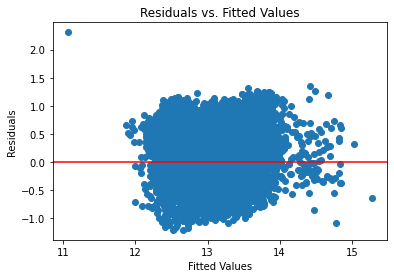

In [118]:
# #Residuals vs. Fitted Values Plot to check for Homoscedasticity

# Assuming 'multiple_model_2' is the fitted regression model

residuals = multiple_model_2.resid
fitted_values = multiple_model_2.fittedvalues

# Plot residuals against fitted values to check for homoscedasticity
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='-')  # Adding a horizontal line at y=0 for reference
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


<ipython-input-172-9dd58271b716>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


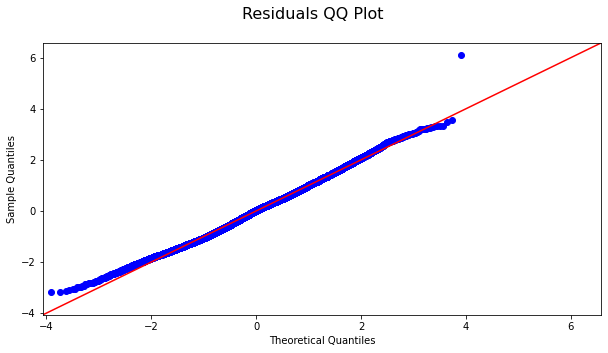

In [172]:
# Test for Normality of Residuals

# Assuming 'multiple_model_2' is the fitted regression model
residuals = multiple_model_2.resid
fitted_values = multiple_model_2.fittedvalues

# Plot residuals against fitted values to check for homoscedasticity 
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='DejaVu Sans')
fig.set_size_inches(10, 5)
fig.show()

In [173]:
''' 
The residuals are normally distributed thus our model passes the assumption of normality.
'''

' \nThe residuals are normally distributed thus our model passes the assumption of normality.\n'

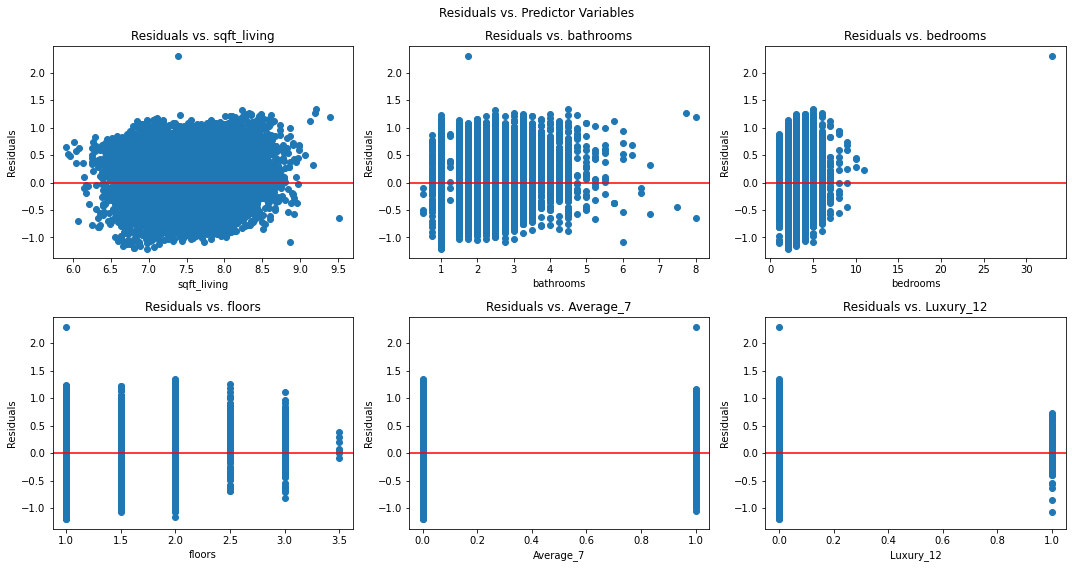

In [177]:
# Residuals vs. Predictor Variables (for linearity and independence)
# Assuming 'X' contains predictor variables used in the model

X = filt_data[['sqft_living', 'bathrooms', 'bedrooms', 'floors', 'Average_7', 'Luxury_12']]

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle("Residuals vs. Predictor Variables")

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

for i, col in enumerate(X):
    ax = axes[i]
    ax.scatter(X[col], multiple_model_2.resid)
    ax.axhline(y=0, color='r', linestyle='-')
    ax.set_xlabel(col)
    ax.set_ylabel('Residuals')
    ax.set_title(f'Residuals vs. {col}')

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()


# VALIDATION OF THE MODEL

The following code performs cross validation to assess the performance of our model and generalization of unseen data.

In [124]:
# X' contains the predictors and 'y' contains the target variable from your dataset
X = filt_data[['sqft_living', 'bathrooms', 'bedrooms', 'floors', 'Average_7', 'Luxury_12']]
y = filt_data['price']

# Split the data into training and test sets (75% training, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a linear regression model
multiple_model_2 = LinearRegression()

# Fit the model on the training data
multiple_model_2.fit(X_train, y_train)

# Perform cross-validation and calculate both R^2 and mean squared error
cv_scores_r2 = cross_val_score(multiple_model_2, X_train, y_train, cv=5, scoring='r2')
cv_scores_mse = -cross_val_score(multiple_model_2, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print("Cross-validation R^2 scores:", cv_scores_r2)
print("Mean R^2 score:", np.mean(cv_scores_r2))
print("Cross-validation MSE scores:", cv_scores_mse)
print("Mean MSE:", np.mean(cv_scores_mse))

# Evaluate the model on the test set
y_pred_test = multiple_model_2.predict(X_test)
test_r2 = multiple_model_2.score(X_test, y_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print("Test R^2 score:", test_r2)
print("Test MSE:", test_mse)


Cross-validation R^2 scores: [0.48161229 0.48059014 0.50803613 0.48848282 0.46995118]
Mean R^2 score: 0.4857345142675077
Cross-validation MSE scores: [0.14732577 0.14226421 0.1402082  0.14219079 0.14271437]
Mean MSE: 0.14294066536015956
Test R^2 score: 0.4833251170315963
Test MSE: 0.1418661043082534


## CONCLUSION

The best price predictor o.f house price during renovations with the intent to sell in King's county is sqft_living and grade.As home owner plan to renovate their house and add more square footage of space they must also make sure their building grade is as close to the best as possible to increase the value of one's house.

The model has its limitations as the need to log-transform one of the variables to satisfy the regression assumptions, any new data input needs to undergo the same preprocessing.Without the use of regional data it must be remebered that house value may differ according their zipcodes

Future analysis should explore better predictors of the prices of homes outside King County.